### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Line Detection with Canny Algorithm**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

The Canny algorithm is a widely used and highly regarded method in computer vision for edge detection. Its primary goal is to accurately identify significant edges within an image while simultaneously minimizing the impact of noise and maximizing the localization of the detected edges. This is achieved through a multi-stage process, each step playing a crucial role in refining the edge map. The algorithm consists of the following key steps:

#### 1. **Smoothing with a Gaussian filter:** 
A Gaussian filter is applied to reduce noise in the image before computing the edges. The mathematical equation for the Gaussian filter is:

G(x, y) = (1 / (2 * π * σ^2)) * exp(-(x^2 + y^2) / (2 * σ^2))

This convolution effectively blurs the image, reducing high-frequency noise while preserving important image features to a greater extent than a simple box blur.

#### 2. **Gradient calculation:** 
After smoothing, the algorithm calculates the image gradient, which represents the rate of change of pixel intensity. This is typically done using operators like the Sobel operator.  The Sobel operator calculates the partial derivatives in the x and y directions, denoted as *G<sub>x</sub>* and *G<sub>y</sub>*, respectively.

#### 3. **Non-Maximum Suppression (NMS):** 
The gradient calculation often produces "thick" edges. NMS thins these edges by examining the gradient magnitude at each pixel and comparing it to its neighbors along the gradient direction.  This involves:

*   Determining the gradient direction to the nearest 45-degree angle (e.g., 0°, 45°, 90°, 135°).
*  Comparing the magnitude of the current pixel with the magnitude of its two neighbors along the quantized gradient direction.
*   If the current pixel's magnitude is not a local maximum (i.e., it's not the strongest), its magnitude is set to zero.

#### 4. **Hysteresis thresholding:** 
After NMS, some weak edges might still remain. Hysteresis thresholding uses two thresholds: a high threshold (*T<sub>high</sub>*) and a low threshold (*T<sub>low</sub>*).

*   Pixels with a gradient magnitude above *T<sub>high</sub>* are considered strong edges and are kept.
*   Pixels with a magnitude below *T<sub>low</sub>* are discarded.
*  Pixels with a magnitude between *T<sub>low</sub>* and *T<sub>high</sub>* are considered weak edges, but they are kept *only* if they are connected to a strong edge.  This connection is typically determined by checking the 8-connected neighbors.

#### **Considerations when using this algorithm:**

1. **The value of $\sigma$ (sigma):** This refers to the standard deviation of the Gaussian filter and determines the degree of smoothing applied to the image. Larger values result in stronger smoothing, while smaller values preserve more details.

2. **Threshold selection:** The quality of edge detection depends on these thresholds. If they are too high, some edges may be lost; if they are too low, false edges may be detected.

3. **Noise:** Noise can produce false edges when computing gradients. This is mitigated using the Gaussian filter, Non-Maximum Suppression (NMS), and hysteresis thresholding.

4. **Image scale:** High-resolution images may lead to excessive edge detection, whereas low-resolution images may miss important details.

5. **Lighting and contrast:** Since the algorithm is based on intensity gradients, uniform lighting and high contrast help detect real edges and avoid false detections.

6. **Computational cost:** The Canny algorithm, while effective, can be computationally intensive, especially for large images. Optimized implementations and hardware acceleration can be used to improve performance. Consider if real-time constraints are present.


### Importing libraries

In [1]:
import cv2
import skimage
import numpy as np
from scipy import ndimage
from skimage import exposure
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med

/var/folders/yv/wvk5jfnx7tq2zm0wb607sjnh0000gn/T/ipykernel_78334/29601034.py:9: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve
/var/folders/yv/wvk5jfnx7tq2zm0wb607sjnh0000gn/T/ipykernel_78334/29601034.py:10: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter as gauss
/var/folders/yv/wvk5jfnx7tq2zm0wb607sjnh0000gn/T/ipykernel_78334/29601034.py:11: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import median_filter as med


### Loading Images

In [2]:
# Loading images
car = cv2.imread("./data/cars.jpg")
car_image = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
bird = cv2.imread("data/bird.jpg")
bird_image = cv2.cvtColor(bird, cv2.COLOR_BGR2GRAY)
city = cv2.imread("data/city.jpg")
city_image = cv2.cvtColor(city, cv2.COLOR_BGR2GRAY)
face = cv2.imread("data/face.jpg")
face_image = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

In [3]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray"):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if i < len(labels):
                ax.set_title(labels[i])
            # dont show the axis ticks
            ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()


### 1. Noise Reduction
Edge detection algorithms, especially those relying on derivatives (like the Canny detector), are inherently sensitive to noise. Noise can manifest as spurious edges, making it difficult to distinguish true edges from noise artifacts. Therefore, noise reduction is a crucial preprocessing step in the Canny algorithm.  The primary method for noise reduction in the Canny algorithm is Gaussian filtering.

#### Gaussian Filtering

Gaussian filtering is a convolution operation that blurs the image, effectively reducing high-frequency noise.  It's preferred over simpler blurring techniques (like box blurring) because it preserves important image features, such as edges, to a greater extent.  This preservation is due to the Gaussian kernel's shape, which provides a weighted averaging of neighboring pixels.

#### Gaussian Kernel

The Gaussian kernel is a matrix of values derived from the Gaussian function. Equation for Gaussian Kernel of size $(2k+1) \times (2k+1)$

$$
H_{i, j} = \frac{1}{2\pi\sigma^2}exp(-\frac{(i-(k+1))^2 + (j-(k+1))^2}{2\sigma^2}); 1\leq i, j \leq (2k+1)
$$

Where:

* H_{i, j} represents the value of the Gaussian kernel at position (i, j).
* σ (sigma) is the standard deviation, controlling the width and thus the amount of smoothing.
* (2k+1) x (2k+1) defines the kernel size (must be odd). k is related to the kernel size. For example, for a 5x5 kernel, k = 2.


The Gaussian kernel is centered, with the highest value at the center and values decreasing as you move away from the center.  This means that the central pixel has the greatest influence on the weighted average, and neighboring pixels contribute less and less as their distance from the center increases

### 1.1 Sigma Parameter $\sigma$

The sigma parameter (σ) is the most important parameter in Gaussian filtering. It directly controls the amount of blurring:

* **Larger σ:** A larger sigma results in a wider Gaussian kernel. This leads to more aggressive blurring, effectively reducing noise but also potentially blurring fine details and merging closely spaced edges. It averages over a larger neighborhood.

* **Smaller σ:** A smaller sigma produces a narrower Gaussian kernel. This preserves finer details and sharper edges, making the algorithm more sensitive to noise as it averages over a smaller neighborhood.

Choosing the right sigma is a trade-off between noise reduction and detail preservation.  It often requires experimentation, as the optimal value depends on the characteristics of the image and the specific application.  If the image is known to be very noisy, a larger sigma is appropriate.  If preserving fine details is paramount, a smaller sigma should be used.

In [4]:
# Change this parameter
sigma_ = [1, 1.5, 5, 10, 20]

### 1.2 Kernel Size Parameter

The kernel size, typically represented as an odd number (e.g., 3x3, 5x5, 7x7), determines the spatial extent of the Gaussian filter.  It defines the size of the neighborhood of pixels used in the weighted averaging.  Larger kernel sizes mean more blurring:

* **Larger Kernel:** A larger kernel size implies a wider area of influence for each pixel, resulting in more pronounced smoothing. It averages over a larger region of the image.

* **Smaller Kernel:** A smaller kernel size limits the averaging to a smaller neighborhood around each pixel, resulting in less smoothing.

While the kernel size does contribute to smoothing, it is less influential than the sigma parameter.  Generally, you would select a small odd number for the kernel size (e.g., 3, 5 or 7) and then tune the sigma to achieve the desired smoothing.  The kernel size should be large enough to encompass the spatial extent of the noise you are trying to remove, but not so large that it blurs important image features.  It is important to consider the kernel size in conjunction with the sigma value.  They work together to determine the degree of smoothing.

In [5]:
kernel_size = (5,5)

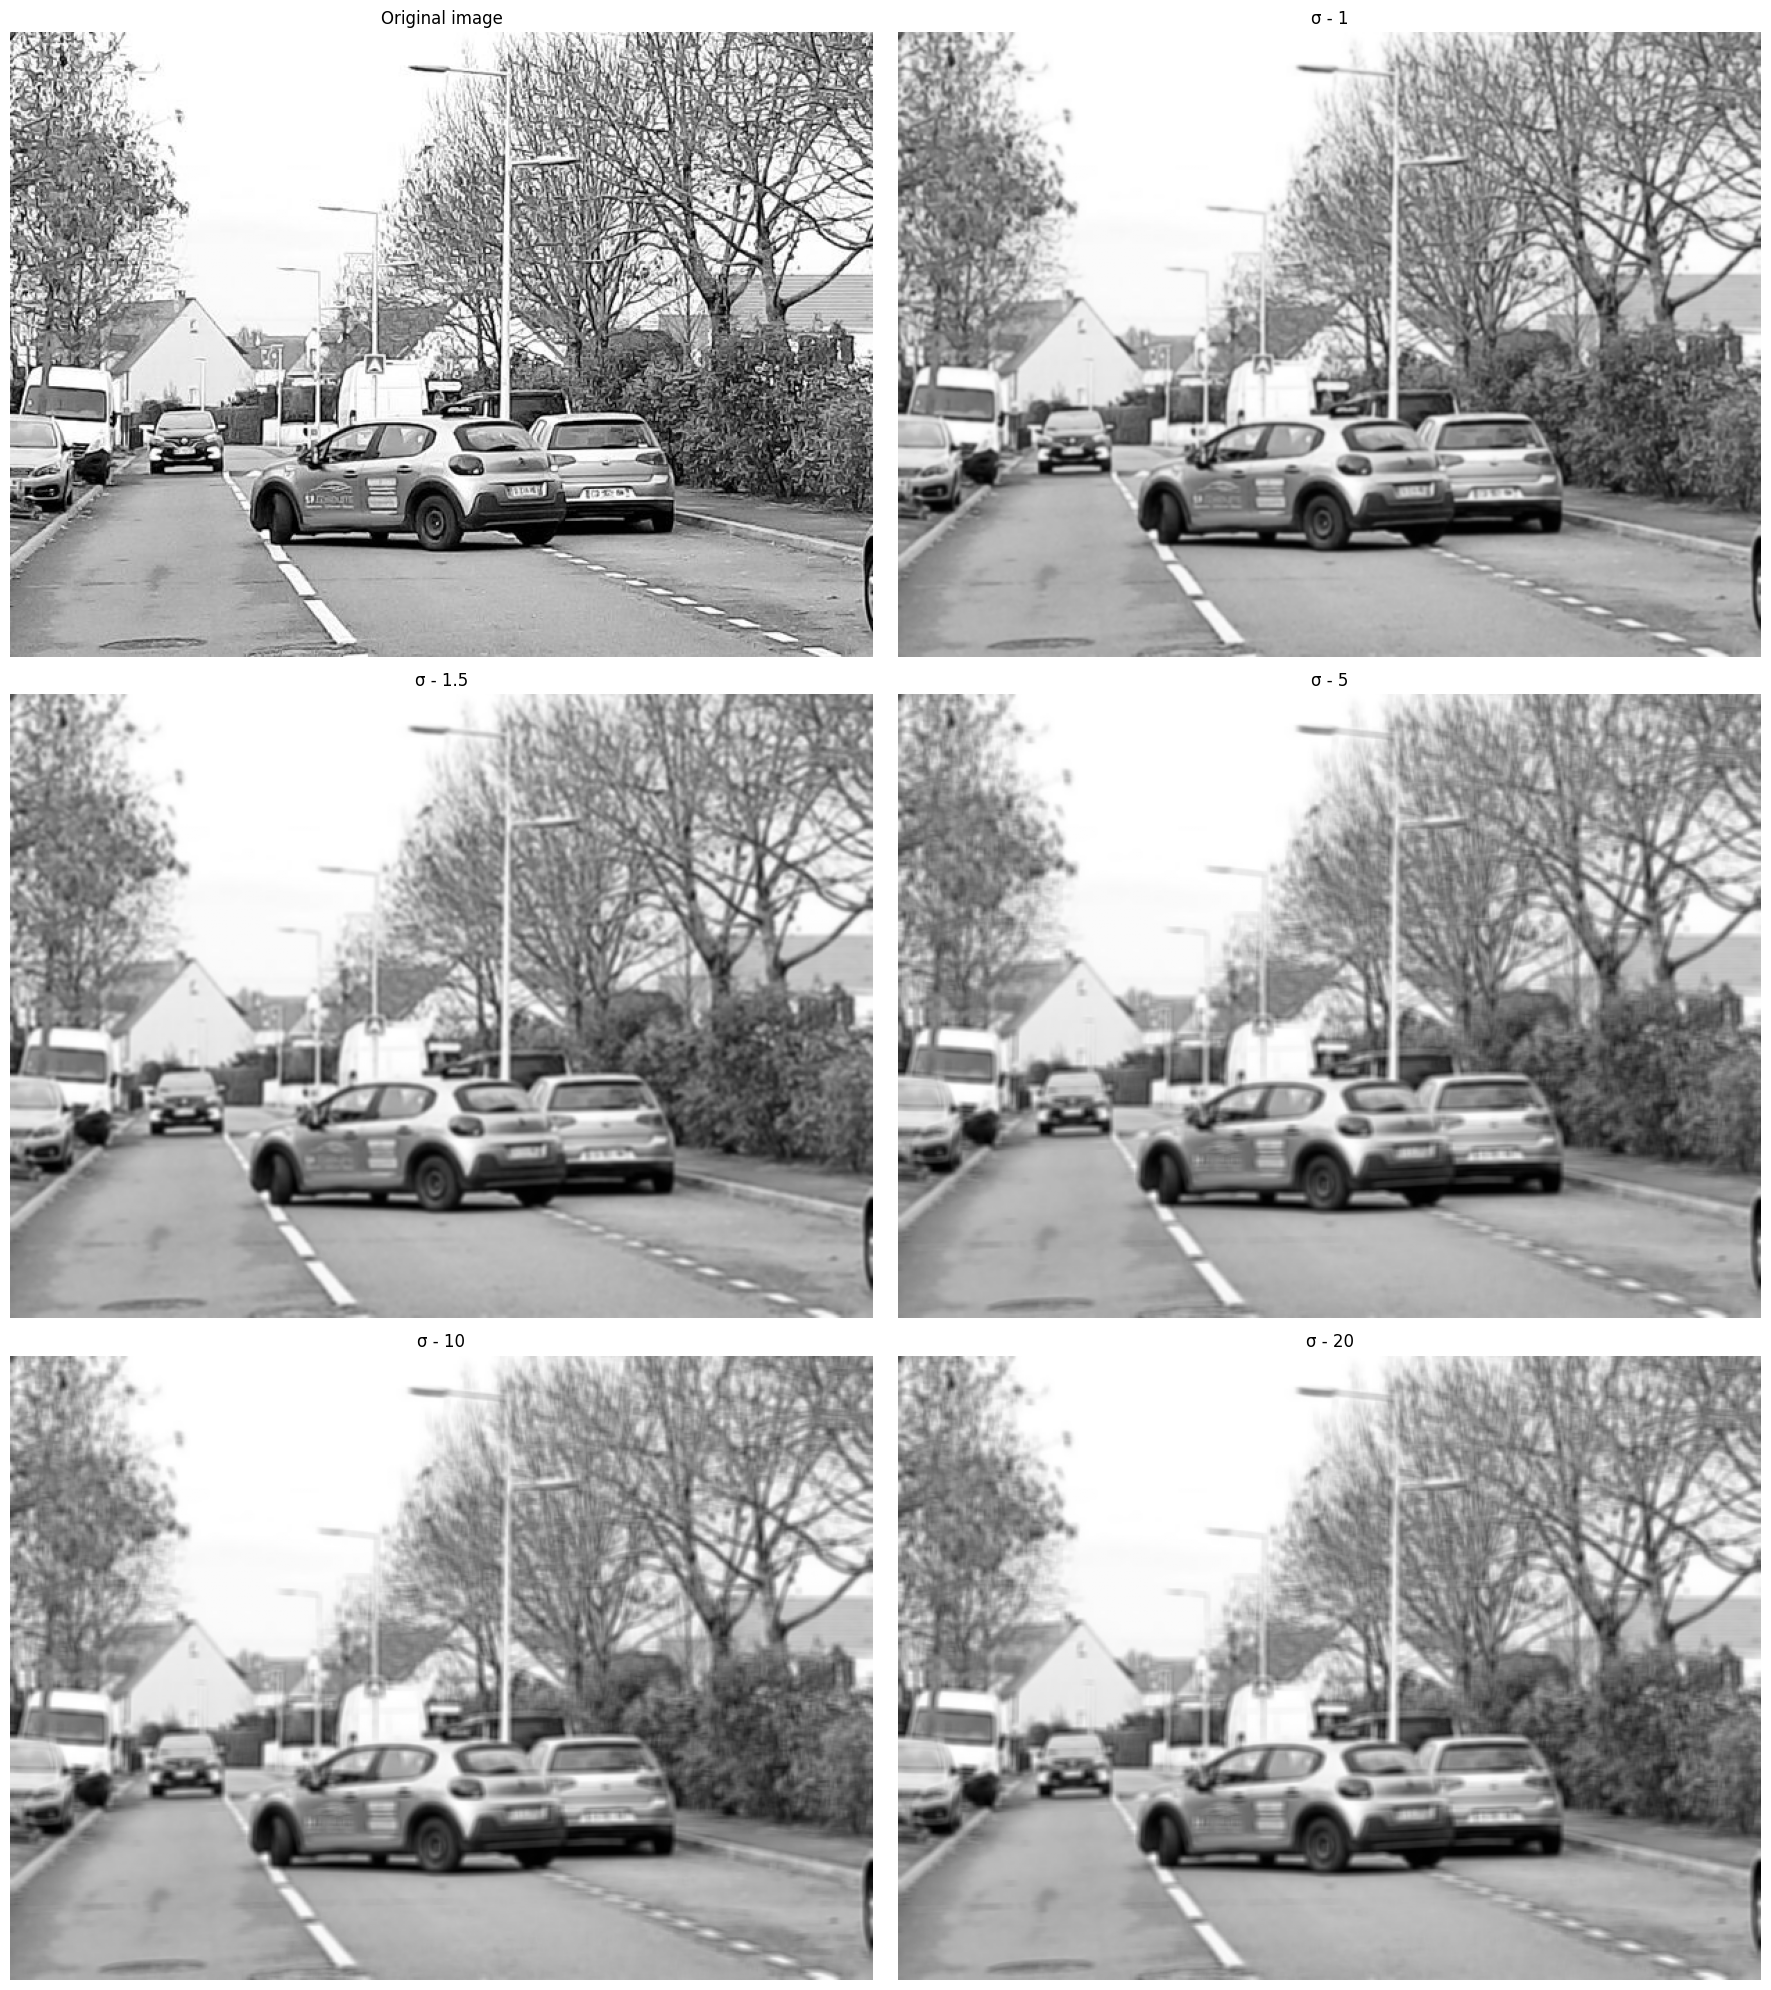

In [6]:
def noise_removal(image, kernel_size, sigma_, labels = []):
    # try different 
    transformed_images = [cv2.GaussianBlur(image, kernel_size, sigma) for sigma in sigma_]
    # set original image
    transformed_images[:0] = [image]
    
    if len(labels) < 1:
        sigma_symbol = "\u03C3"
        labels = [f"{sigma_symbol} - {str(sigma)}" for sigma in sigma_]
        labels[:0] =[ "Original image"]
    
    return transformed_images, labels

blured_images, labels = noise_removal(car_image.copy(), kernel_size, sigma_)

plot_images(blured_images, labels, nrows=3, ncols=2, figsize=(18,20))

Changing the sigma parameter in a Gaussian filter allows us to observe how the image is affected by the smoothing process. The higher the sigma value, the more blurred the image becomes. This is because the Gaussian kernel becomes larger, and the values of the kernel are more spread out, resulting in a wider area of influence for each pixel.

When sigma is small, the Gaussian kernel is more concentrated, preserving finer details and edges in the image. However, as sigma increases, the kernel encompasses a broader range of neighboring pixels, leading to a stronger averaging effect. This averaging reduces high-frequency noise and sharp edges, resulting in a smoother, more blurred appearance.

### 2. Canny with and without Noise Reduction


In [7]:
labels.insert(1,"Canny Detector without noise removal")

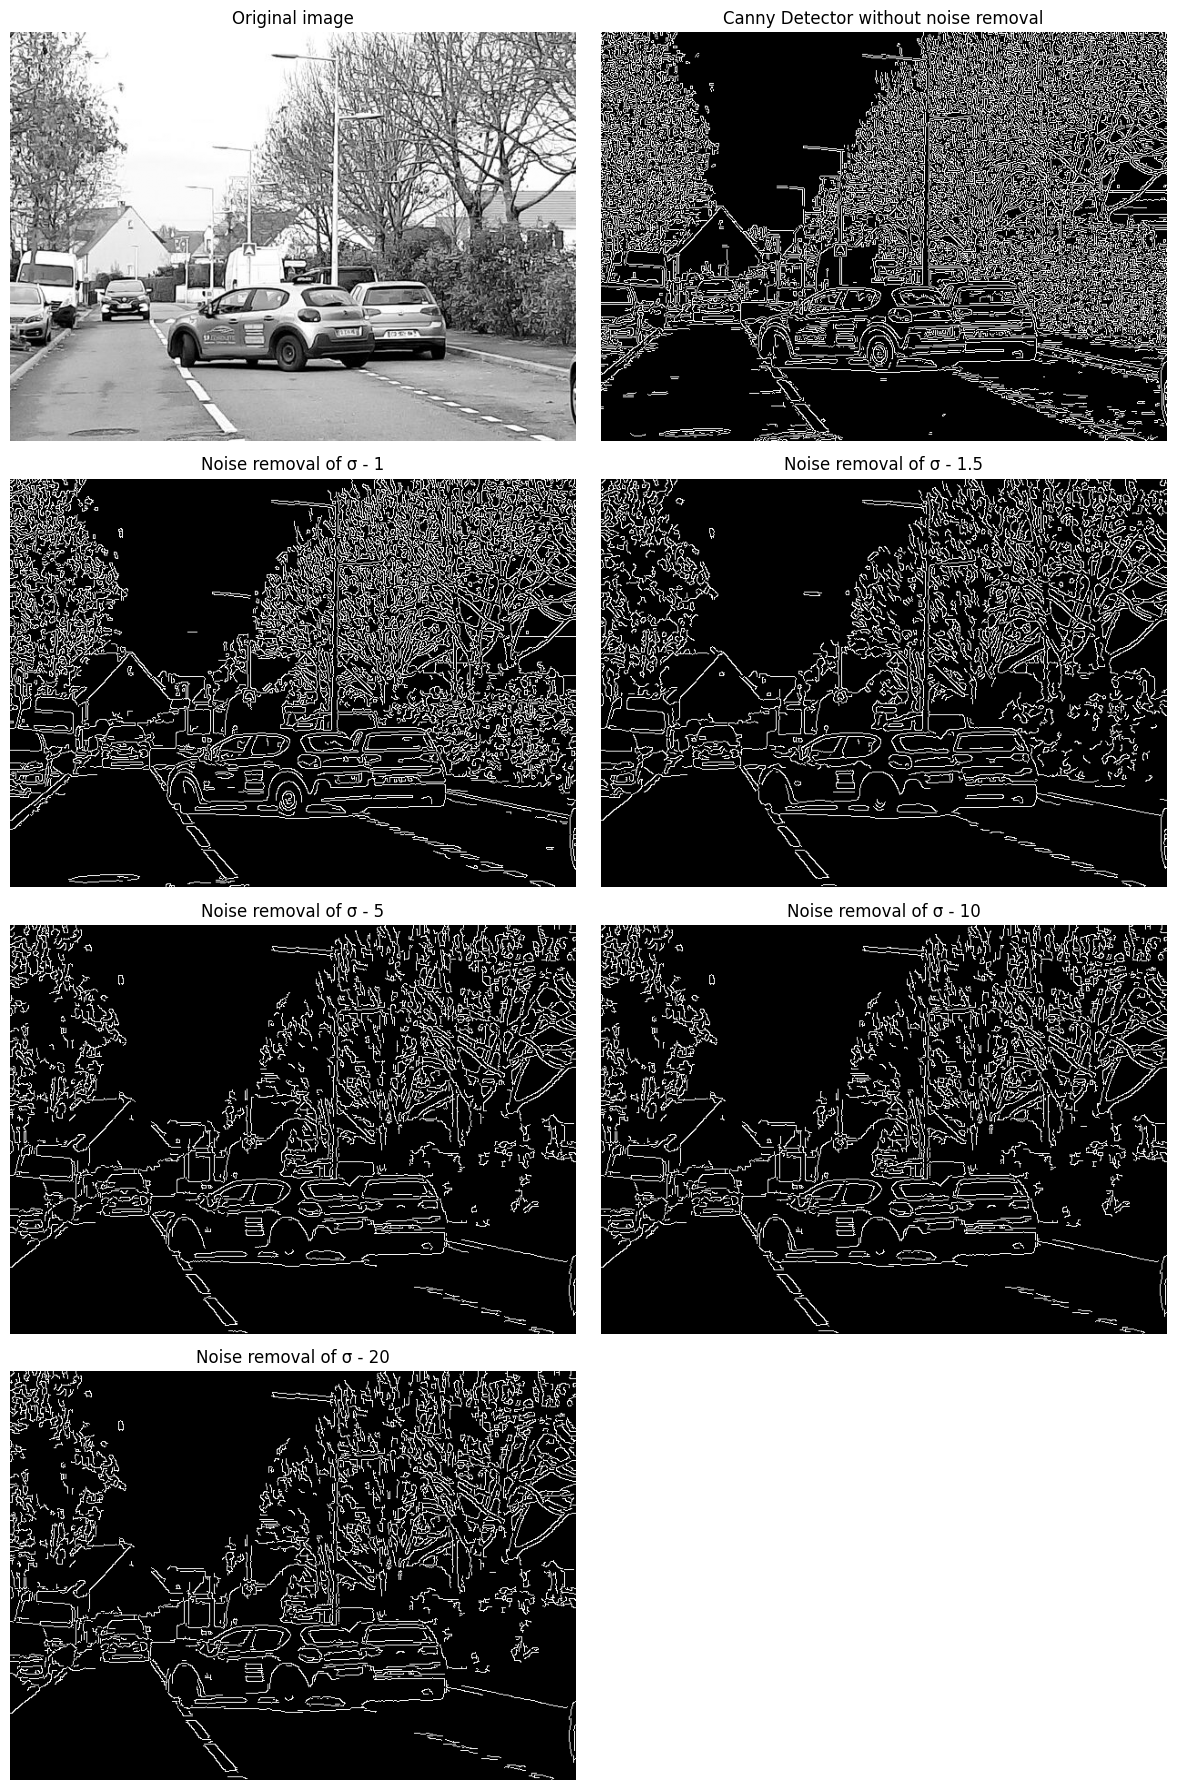

In [8]:
def canny(images, low_umbral=100, high_umbral=200):
    # applying image detection
    transformed_images = [cv2.Canny(image, low_umbral, high_umbral) for image in images]
    transformed_images[:0] = [car_image]
    return transformed_images


labels[2:] = [f"Noise removal of {label}" for label in labels[2:] ]
plot_images(canny(blured_images), labels, ncols=2, nrows=4, figsize=(12,18))

As seen, noise reduction is a key step in the Canny algorithm. The following images show the results of applying the Canny algorithm with and without noise reduction. Noise reduction helps the Canny algorithm to detect edges more accurately by reducing the noise in the image.

**Key Observations:**

1. **Without Noise Reduction:** The Canny edge detector is highly sensitive to noise, resulting in a large number of false edges. This can be observed in the image labeled "Canny Detector without noise removal."

2. **With Noise Reduction:** The images labeled "Noise removal of σ - X" (where X is the sigma value) show cleaner and more accurate edge maps. Higher sigma values result in more blurred images, which reduce noise but may also smooth out some finer details. Lower sigma values preserve more details but may not remove all noise.


By carefully selecting the sigma value for the Gaussian blur, we can achieve a balance between noise reduction and edge preservation, leading to more accurate and reliable edge detection results.

### Different Image examples



In [9]:
def canny(original_image,images, low_umbral=100, high_umbral=200):
    # applying image detection
    transformed_images = [cv2.Canny(image, low_umbral, high_umbral) for image in images]
    transformed_images[:0] = [original_image]
    return transformed_images

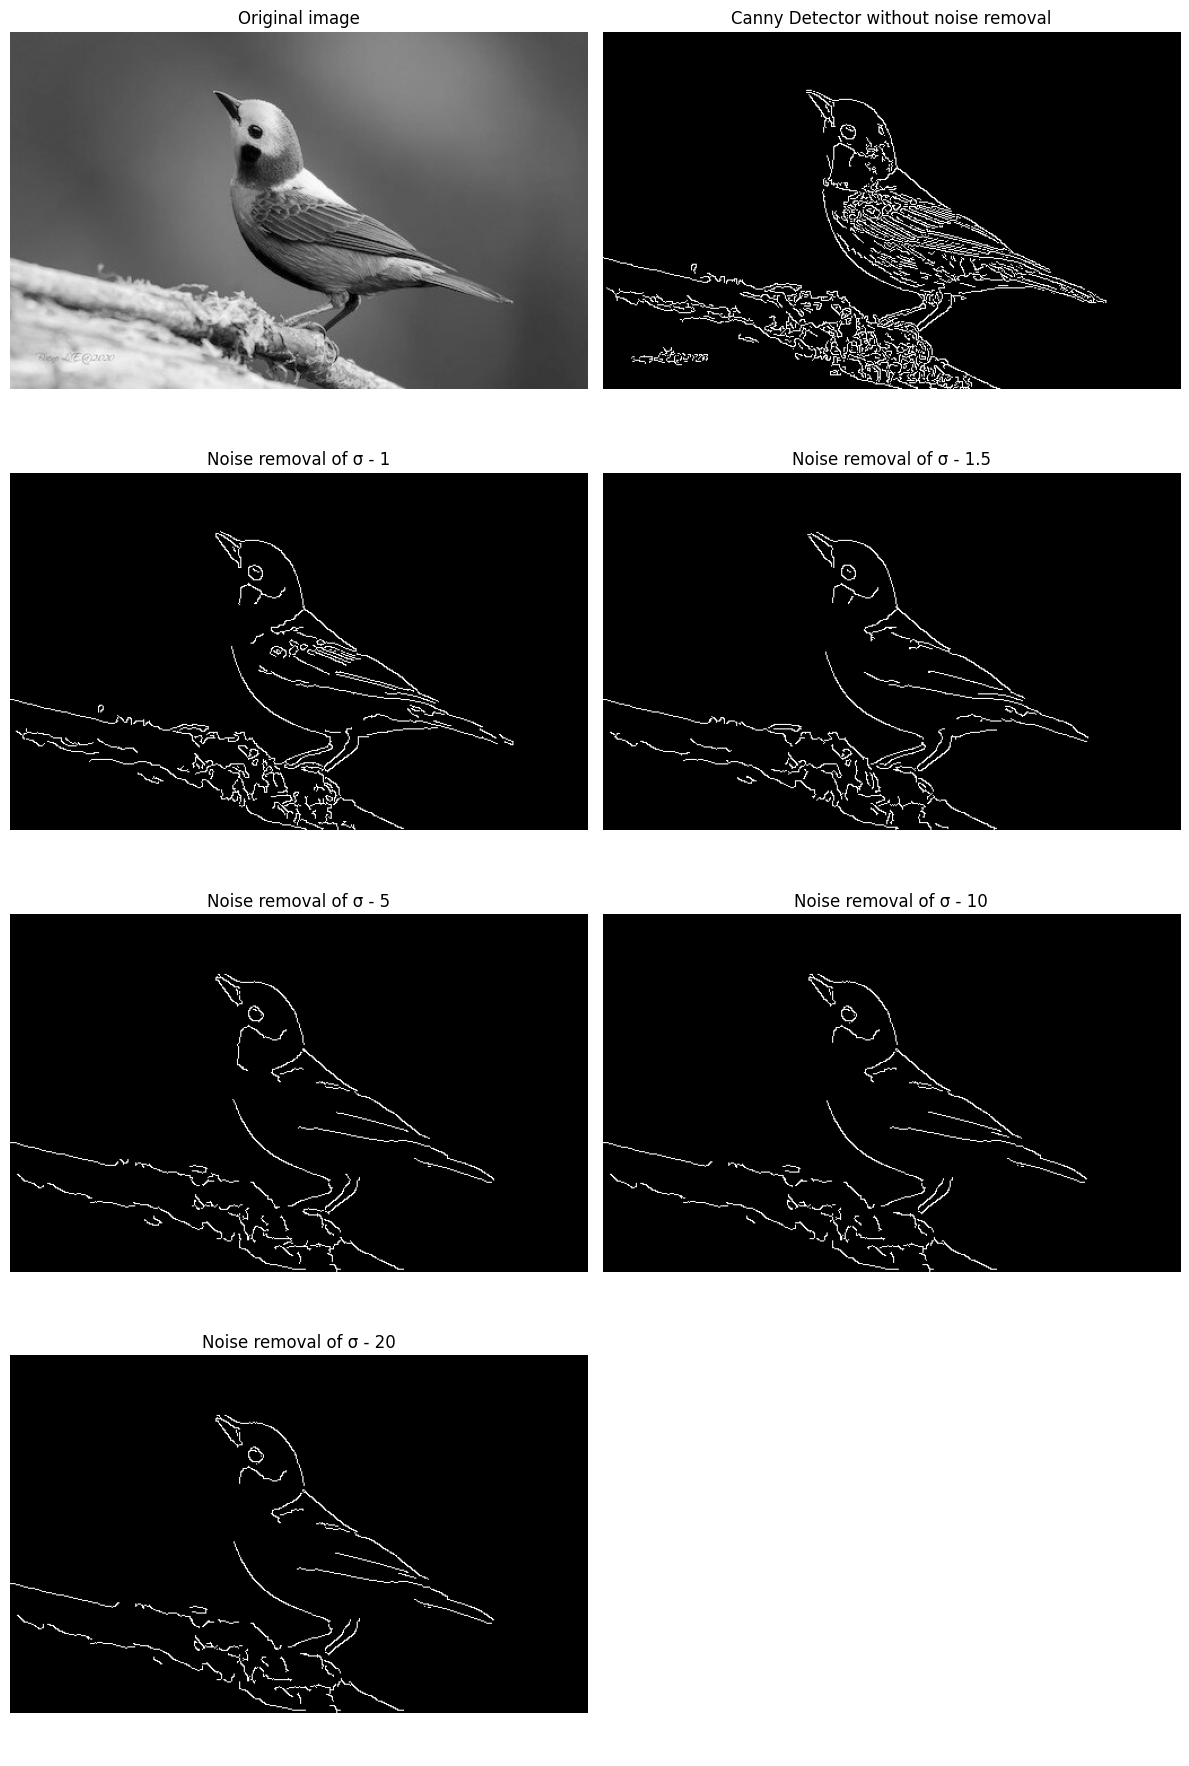

In [10]:
#Image number 1
blured_images, labels = noise_removal(bird_image.copy(), kernel_size, sigma_)
labels.insert(1,"Canny Detector without noise removal")
labels[2:] = [f"Noise removal of {label}" for label in labels[2:] ]
plot_images(canny(bird_image,blured_images), labels, ncols=2, nrows=4, figsize=(12,18))

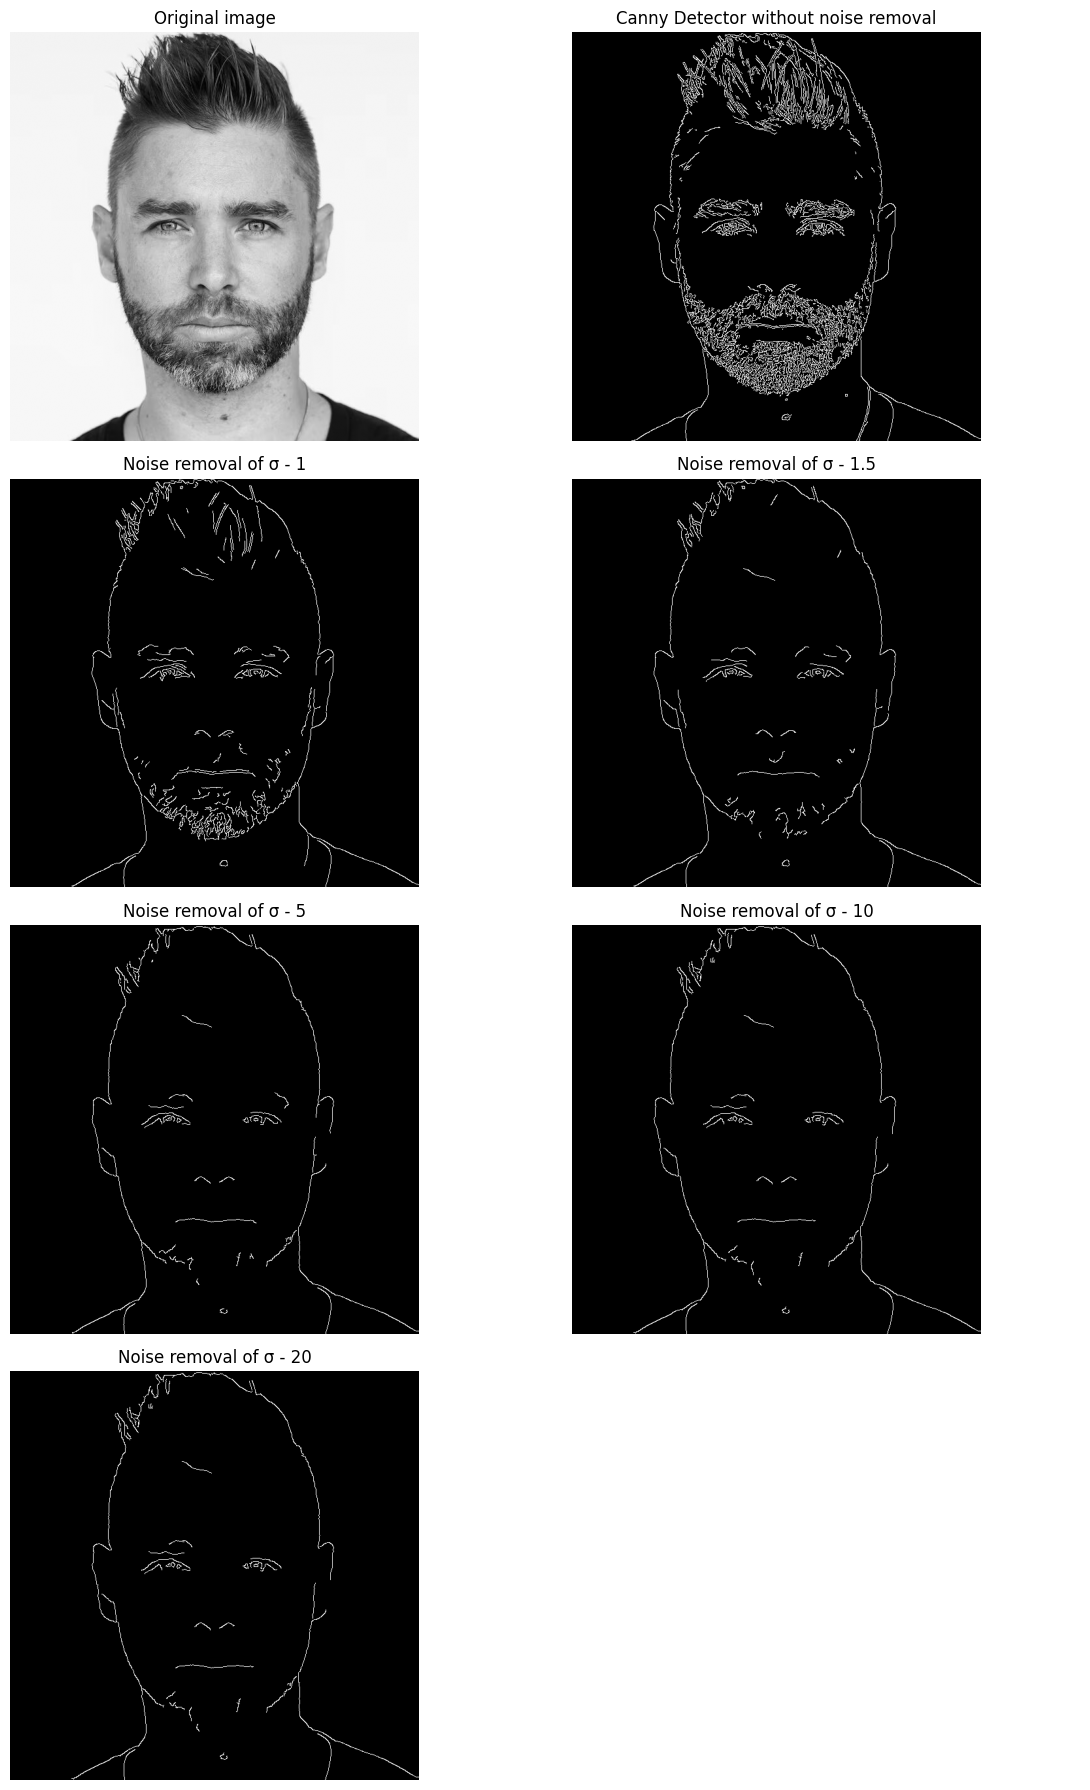

In [11]:
#Image number 2
blured_images, labels = noise_removal(face_image.copy(), kernel_size, sigma_)
labels.insert(1,"Canny Detector without noise removal")
labels[2:] = [f"Noise removal of {label}" for label in labels[2:] ]
plot_images(canny(face_image,blured_images), labels, ncols=2, nrows=4, figsize=(12,18))

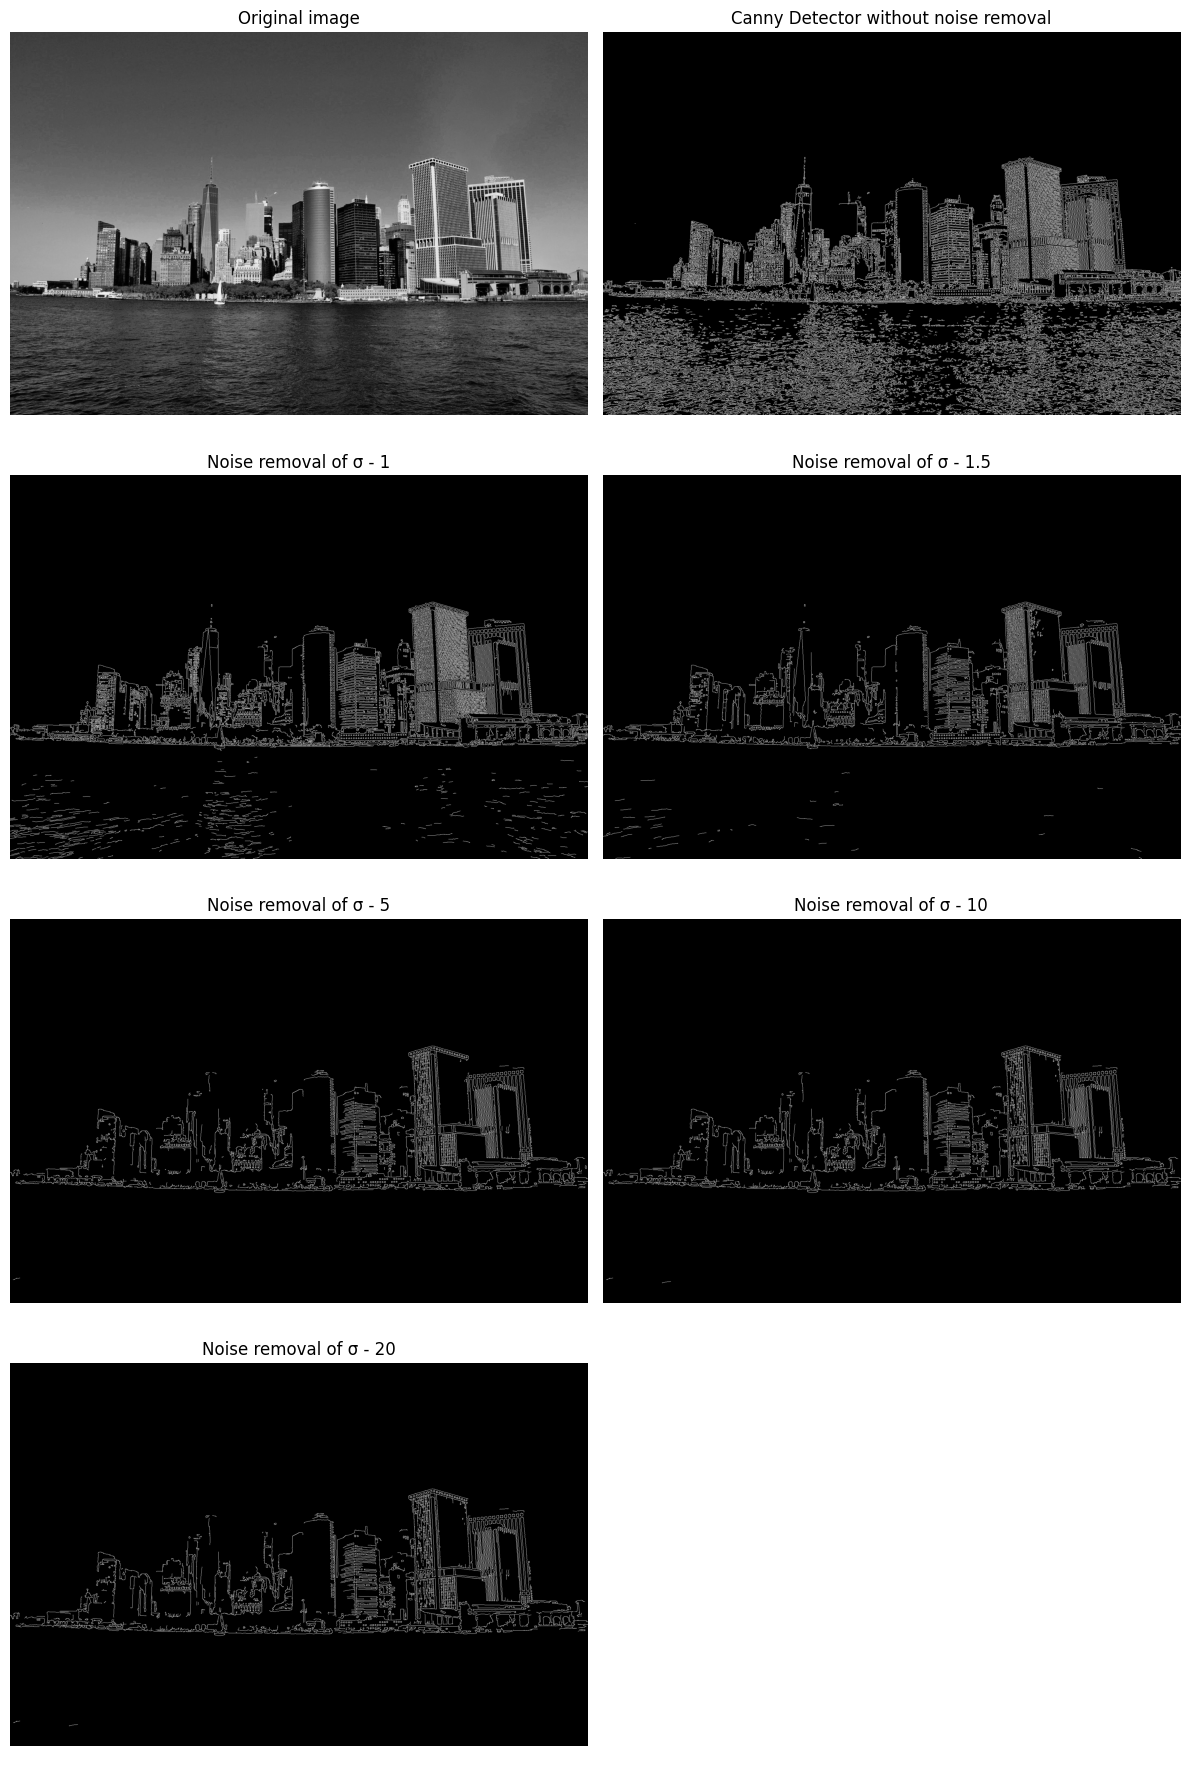

In [12]:
#Image number 3
blured_images, labels = noise_removal(city_image.copy(), kernel_size, sigma_)
labels.insert(1,"Canny Detector without noise removal")
labels[2:] = [f"Noise removal of {label}" for label in labels[2:] ]
plot_images(canny(city_image,blured_images), labels, ncols=2, nrows=4, figsize=(12,18))

We tested the Canny detector with different images using noise reduction and different sigma values. This allowed us to observe how the algorithm behaves with various images and parameters. Additionally, we demonstrated how the Canny algorithm can be used to detect lines in images.

#### Bird Image
It was observed that the Canny detector performed well on the bird image, detecting the edges of the bird and the branches clearly. The noise reduction helped to remove unwanted artifacts and improve the edge detection results.

#### Face Image
The Canny detector was able to detect the edges of the face and the glasses effectively. The noise reduction process helped to improve the quality of the edge detection by reducing noise and enhancing the clarity of the edges.

#### City Image
The Canny detector worked well at first glance, detecting the edges of the buildings and structures in the cityscape. Buta after increasing the sigma value, the image became more blurred, and some details were lost. This demonstrates the trade-off between noise reduction and edge preservation when selecting the sigma value.


By testing the Canny detector with these different images and parameters, we gained insights into how noise reduction and sigma values affect edge detection. This helps in selecting appropriate parameters for different types of images to achieve optimal edge detection results.


### Dynamic example

In the following example, we demonstrate in real time the sigma and threshold parameters of the Canny algorithm. By adjusting these parameters, you can observe how they affect the edge detection results. This interactive visualization allows you to explore the impact of different settings on the edge detection process.

<img src="./data/example.jpeg" alt="Image Alt Text" width="500"/>

In [13]:
def callback(input):
    pass

def canny2(image, sigma=1, kernel_size=(3,3)):
    withname = "canny"
    cv2.namedWindow(withname)
    cv2.createTrackbar("min_threshold", withname, 0, 255, callback)
    cv2.createTrackbar("max_threshold", withname, 0, 255, callback)
    cv2.createTrackbar("sigma", withname, 0, 50, callback)
    # image = 
    
    while True:
        if cv2.waitKey(1) == ord("q"):
            break
        min_threshold = cv2.getTrackbarPos("min_threshold", withname)
        max_threshold = cv2.getTrackbarPos("max_threshold", withname)
        sigma = cv2.getTrackbarPos("sigma", withname)
        
        
        cannyEdge = cv2.Canny(cv2.GaussianBlur(image, kernel_size, sigma), min_threshold, max_threshold)
        cv2.imshow(withname, cannyEdge)
        
    cv2.destroyAllWindows()

# testing with image 1
canny2(car_image, 1.5)

2025-02-16 19:37:23.310 python[78334:3127581] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-16 19:37:23.310 python[78334:3127581] +[IMKInputSession subclass]: chose IMKInputSession_Modern


### Conclusion

In this notebook, we explored the effects of various parameters on edge detection using the Canny algorithm. Our key observations include:

a) **Modifying the Sigma Value**: By adjusting the sigma value in the Gaussian filter, we observed significant changes in the detected lines. Higher sigma values resulted in more blurred images, which in turn affected the sharpness and clarity of the detected edges. Lower sigma values preserved finer details and edges, while higher values smoothed out noise and reduced the number of detected edges.

b) **Analyzing the Behavior of the Canny Detector**: We compared the performance of the Canny edge detector with and without noise removal. Without noise removal, the detector was highly sensitive to noise, resulting in a large number of false edges. After applying Gaussian blur for noise removal, the detector produced cleaner and more accurate edge maps, demonstrating the importance of pre-processing steps in edge detection.

c) **Experimenting with Different Images**: We experimented with images containing varying amounts of lines and textures. The Canny algorithm's performance varied depending on the complexity of the image. Images with more lines and textures required careful tuning of the sigma and threshold parameters to achieve optimal edge detection results.

Overall, this notebook provided valuable insights into the impact of different parameters on the Canny edge detection algorithm and highlighted the importance of noise reduction in achieving accurate edge detection.

### References


- OpenCV. (n.d.). Canny edge detection. OpenCV Documentation. Retrieved February 16, 2025, from https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

- OpenCV. (n.d.). Canny edge detector. OpenCV Documentation. Retrieved February 16, 2025, from https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html

- Rosebrock, A. (2021, May 12). OpenCV edge detection (cv2.Canny). PyImageSearch. Retrieved February 16, 2025, from https://pyimagesearch.com/2021/05/12/opencv-edge-detection-cv2-canny/